# problem statement

### - To predict the price of a vehicles

# data gathering

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# EDA

In [4]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [7]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [8]:
df["normalized-losses"].replace({"?":np.nan},inplace = True)

In [9]:
df["normalized-losses"].fillna(value = (df["normalized-losses"].median()), inplace  =True)

In [10]:
df["normalized-losses"] = df["normalized-losses"].astype(float)

In [11]:
df["normalized-losses"].unique()

array([115., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
        93., 142., 161., 153., 125., 128., 122., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

In [12]:
df["make"].value_counts().to_dict()

{'toyota': 32,
 'nissan': 18,
 'mazda': 17,
 'mitsubishi': 13,
 'honda': 13,
 'volkswagen': 12,
 'subaru': 12,
 'peugot': 11,
 'volvo': 11,
 'dodge': 9,
 'mercedes-benz': 8,
 'bmw': 8,
 'audi': 7,
 'plymouth': 7,
 'saab': 6,
 'porsche': 5,
 'isuzu': 4,
 'jaguar': 3,
 'chevrolet': 3,
 'alfa-romero': 3,
 'renault': 2,
 'mercury': 1}

In [13]:
df = pd.get_dummies(df,columns=["make"])

In [14]:
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,115.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,115.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,115.0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# from sklearn import preprocessing
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [16]:
# label_encoder = preprocessing.LabelEncoder()

# df['make']= label_encoder.fit_transform(df['make'])

# df['make']

In [17]:
df1 = df

In [18]:
df1["fuel-type"].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [19]:
df1["fuel-type"].replace({'gas': 0, 'diesel': 1}, inplace =True)

In [20]:
fuel_type_value = {'gas': 0, 'diesel': 1}

In [21]:
df1["fuel-type"].value_counts()

0    185
1     20
Name: fuel-type, dtype: int64

In [22]:
df1["aspiration"].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [23]:
df1["aspiration"].replace({'std': 0, 'turbo': 1}, inplace = True)

In [24]:
aspiration_value = {'std': 0, 'turbo': 1}

In [25]:
df1["aspiration"].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

In [26]:
df1["num-of-doors"].unique()

array(['two', 'four', '?'], dtype=object)

In [27]:
df1["num-of-doors"].mode()

0    four
Name: num-of-doors, dtype: object

In [28]:
df1["num-of-doors"].replace({"?":"four"}, inplace = True)

In [29]:
df1["num-of-doors"].value_counts().to_dict()

{'four': 116, 'two': 89}

In [30]:
df1["num-of-doors"].replace({'four': 0, 'two': 1}, inplace = True)

In [31]:
num_of_doors_value = {'four': 0, 'two': 1}

In [32]:
df1["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [33]:
df1 = pd.get_dummies(df1,columns=["body-style"])

In [34]:
df1["drive-wheels"].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [35]:
df1["drive-wheels"].replace({'fwd': 0, 'rwd': 1, '4wd': 2}, inplace = True)

In [36]:
drive_wheels = {'fwd': 0, 'rwd': 1, '4wd': 2} 

In [37]:
df1["engine-location"].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [38]:
df1["engine-location"].replace({'front': 0, 'rear': 1}, inplace = True)

In [39]:
engine_location = {'front': 0, 'rear': 1}

In [40]:
df1["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [41]:
df1 = pd.get_dummies(df1 , columns= ["engine-type"])

In [42]:
df1["num-of-cylinders"].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [43]:
# df1 = pd.get_dummies(df1 , columns= ["num-of-cylinders"])

In [44]:
df1["num-of-cylinders"].replace({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12},inplace = True)

In [45]:
num_of_cylinders_value = {'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}

In [46]:
df1["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [47]:
df1 = pd.get_dummies(df1 , columns= ["fuel-system"])

In [48]:
df1["bore"].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [49]:
df1["bore"].mode()

0    3.62
Name: bore, dtype: object

In [50]:
df1["bore"].replace({"?":3.62}, inplace = True)

In [51]:
df1["bore"].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', 3.62, '3.39', '3.76', '3.58', '3.46', '3.8',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [52]:
df1["bore"] = df1["bore"].astype(float)

In [53]:
df1["stroke"].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [54]:
df1["stroke"].replace({"?":(df1["stroke"].mode()[0])},inplace = True)

In [55]:
df1["stroke"] = df1["stroke"].astype(float)

In [56]:
df1["stroke"].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15, 3.16, 3.64, 3.1 , 3.35, 3.12,
       3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64, 3.08,
       3.5 , 3.54, 2.87])

In [57]:
df1["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [58]:
df1["horsepower"].replace({"?":(df1["horsepower"].mode()[0])},inplace = True)

In [59]:
df1["horsepower"] = df1["horsepower"].astype(float)

In [60]:
df1["horsepower"].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,  85.,
       114., 162., 134., 106.])

In [61]:
df1["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [62]:
df1["peak-rpm"].replace({"?":(df1["peak-rpm"].mode()[0])},inplace = True)

In [63]:
df1["peak-rpm"] = df1["peak-rpm"].astype(float)

In [64]:
df1["peak-rpm"].unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5750.,
       5250., 4900., 4400., 6600., 5300.])

In [65]:
df1["price"].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [66]:
df1["price"].replace({"?":np.nan},inplace = True)

In [67]:
df1["price"].replace({np.nan:(df1["price"].median())},inplace = True)

In [68]:
df1["price"] = df1["price"].astype(float)

In [69]:
df1["price"].unique()

array([13495., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
       10295., 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,
        6529.,  7129.,  7295.,  7895.,  9095.,  8845., 12945., 10345.,
        6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,  6795.,
        6695.,  7395., 10945., 11845., 13645., 15645.,  8495., 10595.,
       10245., 10795., 11245., 18280., 18344., 25552., 28248., 28176.,
       31600., 34184., 35056., 40960., 45400., 16503.,  5389.,  6189.,
        6669.,  7689.,  9959.,  8499., 12629., 14869., 14489.,  6989.,
        8189.,  9279.,  5499.,  7099.,  6649.,  6849.,  7349.,  7299.,
        7799.,  7499.,  7999.,  8249.,  8949.,  9549., 13499., 14399.,
       17199., 19699., 18399., 11900., 13200., 12440., 13860., 15580.,
       16900., 16695., 17075., 16630., 17950., 18150., 12764., 22018.,
      

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int64  
 5   drive-wheels            205 non-null    int64  
 6   engine-location         205 non-null    int64  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int64  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [72]:
x = df1.drop(["price"], axis = 1)
y = df1["price"]

In [73]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8 , random_state=0)

In [74]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [75]:
# Model Evaluation for Training Data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 1874654.186395885
Root Mean Sqaured Error : 1369.1801146656655
Mean Absolute Error : 1057.6001691091687
R Squared Value : 0.968733170799266
Adjusted R Squared Value : 0.9490350684028036


In [76]:
# Model Evaluation for Testing Data
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 23431896.756733388
Root Mean Sqaured Error : 4840.650447691239
Mean Absolute Error : 2546.085135694458
R Squared Value : 0.6595546869511507
Adjusted R Squared Value : 0.4450741397303757


In [77]:
# MAE > RMSE ------> outlier is present
# training accuracy is high and testing accuracy is low -----> model overfit

# feature engg

## check outliers and impute it

<AxesSubplot:>

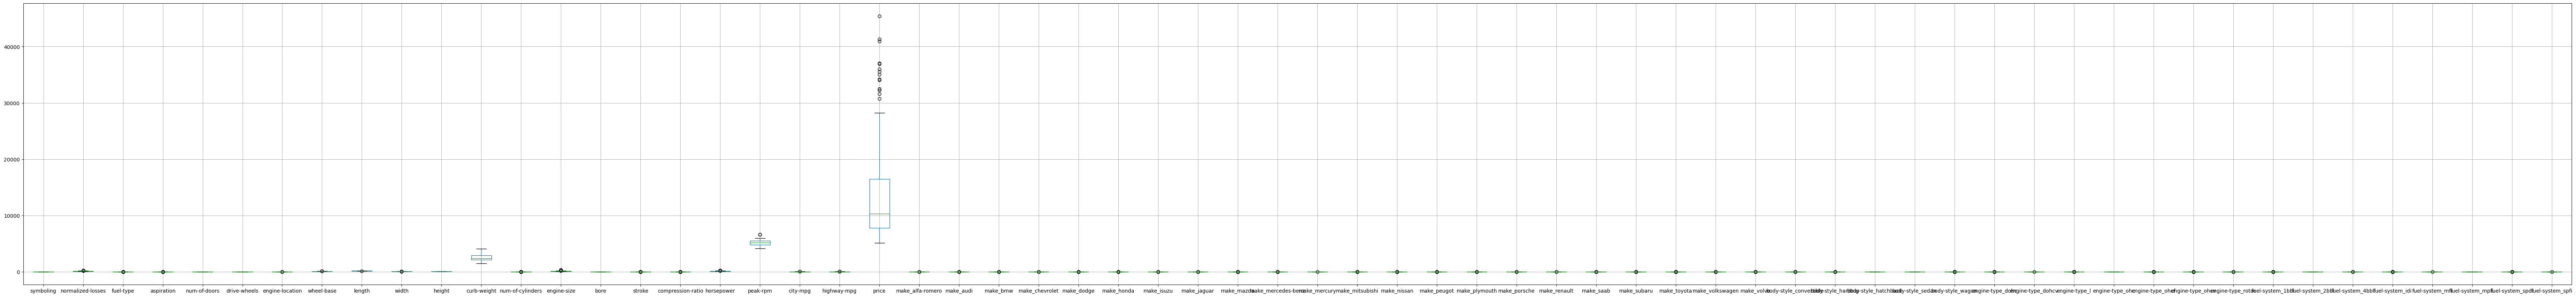

In [78]:
plt.figure(figsize=(90,10))
df1.boxplot()

<AxesSubplot:xlabel='normalized-losses'>

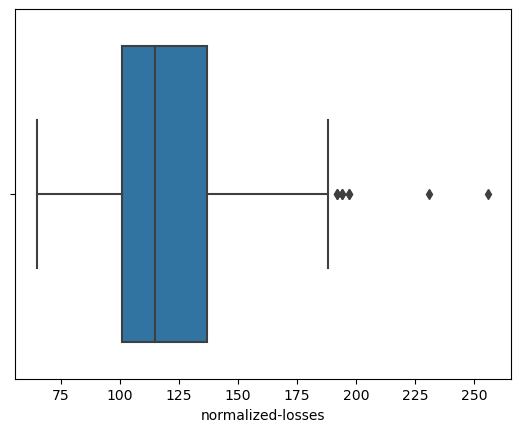

In [79]:
sns.boxplot(x = df1["normalized-losses"])

In [80]:
q1 = df1["normalized-losses"].quantile(0.25)
q3 = df1["normalized-losses"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)


191.0
47.0


In [81]:
df1["normalized-losses"].loc[df1["normalized-losses"] > upper_tail]

10     192.0
11     192.0
104    194.0
105    194.0
106    231.0
178    197.0
179    197.0
190    256.0
Name: normalized-losses, dtype: float64

In [82]:
df1["normalized-losses"].loc[(df1["normalized-losses"] > upper_tail)] = upper_tail

In [83]:
df1["normalized-losses"].loc[df1["normalized-losses"] > upper_tail]

Series([], Name: normalized-losses, dtype: float64)

In [84]:
df1["normalized-losses"].loc[df1["normalized-losses"] < lower_tail]

Series([], Name: normalized-losses, dtype: float64)

In [85]:
q1 = df1["wheel-base"].quantile(0.25)
q3 = df1["wheel-base"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)


114.25000000000001
82.64999999999999


In [86]:
df1["wheel-base"].loc[df1["wheel-base"] > upper_tail]

70    115.6
71    115.6
73    120.9
Name: wheel-base, dtype: float64

In [87]:
df1["wheel-base"].loc[df1["wheel-base"] > upper_tail] = upper_tail

In [88]:
df1["wheel-base"].loc[df1["wheel-base"] > upper_tail]

Series([], Name: wheel-base, dtype: float64)

In [89]:
df1["wheel-base"].loc[df1["wheel-base"] < lower_tail]

Series([], Name: wheel-base, dtype: float64)

In [90]:
q1 = df1["length"].quantile(0.25)
q3 = df1["length"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)


208.29999999999995
141.10000000000002


In [91]:
df1["length"].loc[df1["length"] > upper_tail]

Series([], Name: length, dtype: float64)

In [92]:
df1["length"].loc[df1["length"] > upper_tail] = upper_tail

In [93]:
df1["length"].loc[df1["length"] > upper_tail]

Series([], Name: length, dtype: float64)

In [94]:
df1["length"].loc[df1["length"] < lower_tail]

18    141.1
Name: length, dtype: float64

In [95]:
q1 = df1["width"].quantile(0.25)
q3 = df1["width"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

71.10000000000002
59.89999999999998


In [96]:
df1["width"].loc[df1["width"] > upper_tail]

6      71.4
7      71.4
8      71.4
70     71.7
71     71.7
73     71.7
74     72.0
129    72.3
Name: width, dtype: float64

In [97]:
df1["width"].loc[df1["width"] > upper_tail] = upper_tail

In [98]:
df1["width"].loc[df1["width"] > upper_tail]

Series([], Name: width, dtype: float64)

In [99]:
df1["width"].loc[df1["width"] < lower_tail] 

Series([], Name: width, dtype: float64)

In [100]:
q1 = df1["engine-size"].quantile(0.25)
q3 = df1["engine-size"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)


207.0
31.0


In [101]:
df1["engine-size"].loc[df1["engine-size"] > upper_tail]

15    209
16    209
17    209
47    258
48    258
49    326
71    234
72    234
73    308
74    304
Name: engine-size, dtype: int64

In [102]:
df1["engine-size"].loc[df1["engine-size"] > upper_tail] = upper_tail

In [103]:
df1["engine-size"].loc[df1["engine-size"] > upper_tail]

Series([], Name: engine-size, dtype: int64)

In [104]:
df1["engine-size"].loc[df1["engine-size"] < lower_tail]

Series([], Name: engine-size, dtype: int64)

In [105]:
q1 = df1["compression-ratio"].quantile(0.25)
q3 = df1["compression-ratio"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)


10.600000000000001
7.399999999999999


In [106]:
df1["compression-ratio"].loc[df1["compression-ratio"] > upper_tail]

49     11.5
63     22.7
66     22.0
67     21.5
68     21.5
69     21.5
70     21.5
90     21.9
108    21.0
110    21.0
112    21.0
114    21.0
116    21.0
158    22.5
159    22.5
174    22.5
182    23.0
184    23.0
187    23.0
192    23.0
203    23.0
Name: compression-ratio, dtype: float64

In [107]:
df1["compression-ratio"].loc[df1["compression-ratio"] > upper_tail] = upper_tail

In [108]:
df1["compression-ratio"].loc[df1["compression-ratio"] > upper_tail]

Series([], Name: compression-ratio, dtype: float64)

In [109]:
df1["compression-ratio"].loc[df1["compression-ratio"] < lower_tail]

9      7.0
29     7.0
82     7.0
83     7.0
84     7.0
117    7.0
124    7.0
Name: compression-ratio, dtype: float64

In [110]:
df1["compression-ratio"].loc[df1["compression-ratio"] < lower_tail] = lower_tail

In [111]:
df1["compression-ratio"].loc[df1["compression-ratio"] < lower_tail]

Series([], Name: compression-ratio, dtype: float64)

In [112]:
q1 = df1["stroke"].quantile(0.25)
q3 = df1["stroke"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)


3.8600000000000003
2.6599999999999993


In [113]:
df1["stroke"].loc[df1["stroke"] > upper_tail]

29     3.90
47     4.17
48     4.17
130    3.90
131    3.90
Name: stroke, dtype: float64

In [114]:
df1["stroke"].loc[df1["stroke"] <  lower_tail]

111    2.19
113    2.19
134    2.07
138    2.36
139    2.64
140    2.64
141    2.64
142    2.64
143    2.64
144    2.64
145    2.64
146    2.64
147    2.64
148    2.64
149    2.64
Name: stroke, dtype: float64

In [115]:
q1 = df1["horsepower"].quantile(0.25)
q3 = df1["horsepower"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

185.0
1.0


In [116]:
df1["horsepower"].loc[df1["horsepower"] > upper_tail] 

49     262.0
105    200.0
126    207.0
127    207.0
128    207.0
129    288.0
Name: horsepower, dtype: float64

In [117]:
df1["horsepower"].loc[df1["horsepower"] > upper_tail] = upper_tail

In [118]:
df1["horsepower"].loc[df1["horsepower"] > upper_tail] 

Series([], Name: horsepower, dtype: float64)

In [119]:
df1["horsepower"].loc[df1["horsepower"] < lower_tail] 

Series([], Name: horsepower, dtype: float64)

In [120]:
q1 = df1["peak-rpm"].quantile(0.25)
q3 = df1["peak-rpm"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

6550.0
3750.0


In [121]:
df1["horsepower"].loc[df1["horsepower"] > upper_tail] 

Series([], Name: horsepower, dtype: float64)

In [122]:
df1["horsepower"].loc[df1["horsepower"] < lower_tail] 

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [123]:
df1["horsepower"].loc[df1["horsepower"] < lower_tail] = lower_tail

In [124]:
df1["horsepower"].loc[df1["horsepower"] < lower_tail]

Series([], Name: horsepower, dtype: float64)

In [125]:
q1 = df1["city-mpg"].quantile(0.25)
q3 = df1["city-mpg"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

46.5
2.5


In [126]:
df1["city-mpg"].loc[df1["city-mpg"] > upper_tail] 

18    47
30    49
Name: city-mpg, dtype: int64

In [127]:
df1["city-mpg"].loc[df1["city-mpg"] > upper_tail]  = upper_tail

In [128]:
df1["city-mpg"].loc[df1["city-mpg"] > upper_tail] 

Series([], Name: city-mpg, dtype: float64)

In [129]:
df1["city-mpg"].loc[df1["city-mpg"] < lower_tail]

Series([], Name: city-mpg, dtype: float64)

In [130]:
q1 = df1["highway-mpg"].quantile(0.25)
q3 = df1["highway-mpg"].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

47.5
11.5


In [131]:
df1["highway-mpg"].loc[df1["highway-mpg"] > upper_tail] 

18    53
30    54
90    50
Name: highway-mpg, dtype: int64

In [132]:
df1["highway-mpg"].loc[df1["highway-mpg"] > upper_tail]  = upper_tail

In [133]:
df1["highway-mpg"].loc[df1["highway-mpg"] > upper_tail] 

Series([], Name: highway-mpg, dtype: float64)

In [134]:
df1["highway-mpg"].loc[df1["highway-mpg"] < lower_tail]

Series([], Name: highway-mpg, dtype: float64)

In [135]:
df2 = df1["price"]
df1.drop(["price"], axis = 1,inplace = True)
df1 = pd.concat([ df1, df2], axis = 1)

# feature selection

# assumptio
# 1 linearity

<AxesSubplot:>

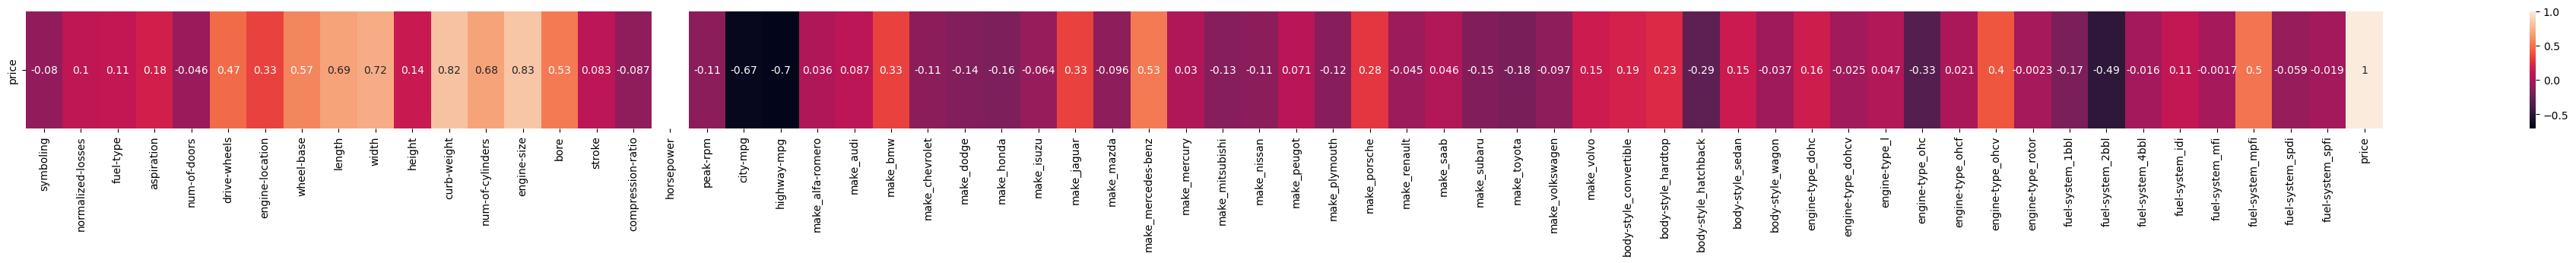

In [136]:
plt.figure(figsize=(50,2))
sns.heatmap(df1.corr().tail(1), annot=True)

In [137]:
x = df1.drop(["price"],axis =1)
y = df1["price"]

# 2 no multicolinearity

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s = pd.Series(vif_list,index=x.columns)    

<AxesSubplot:>

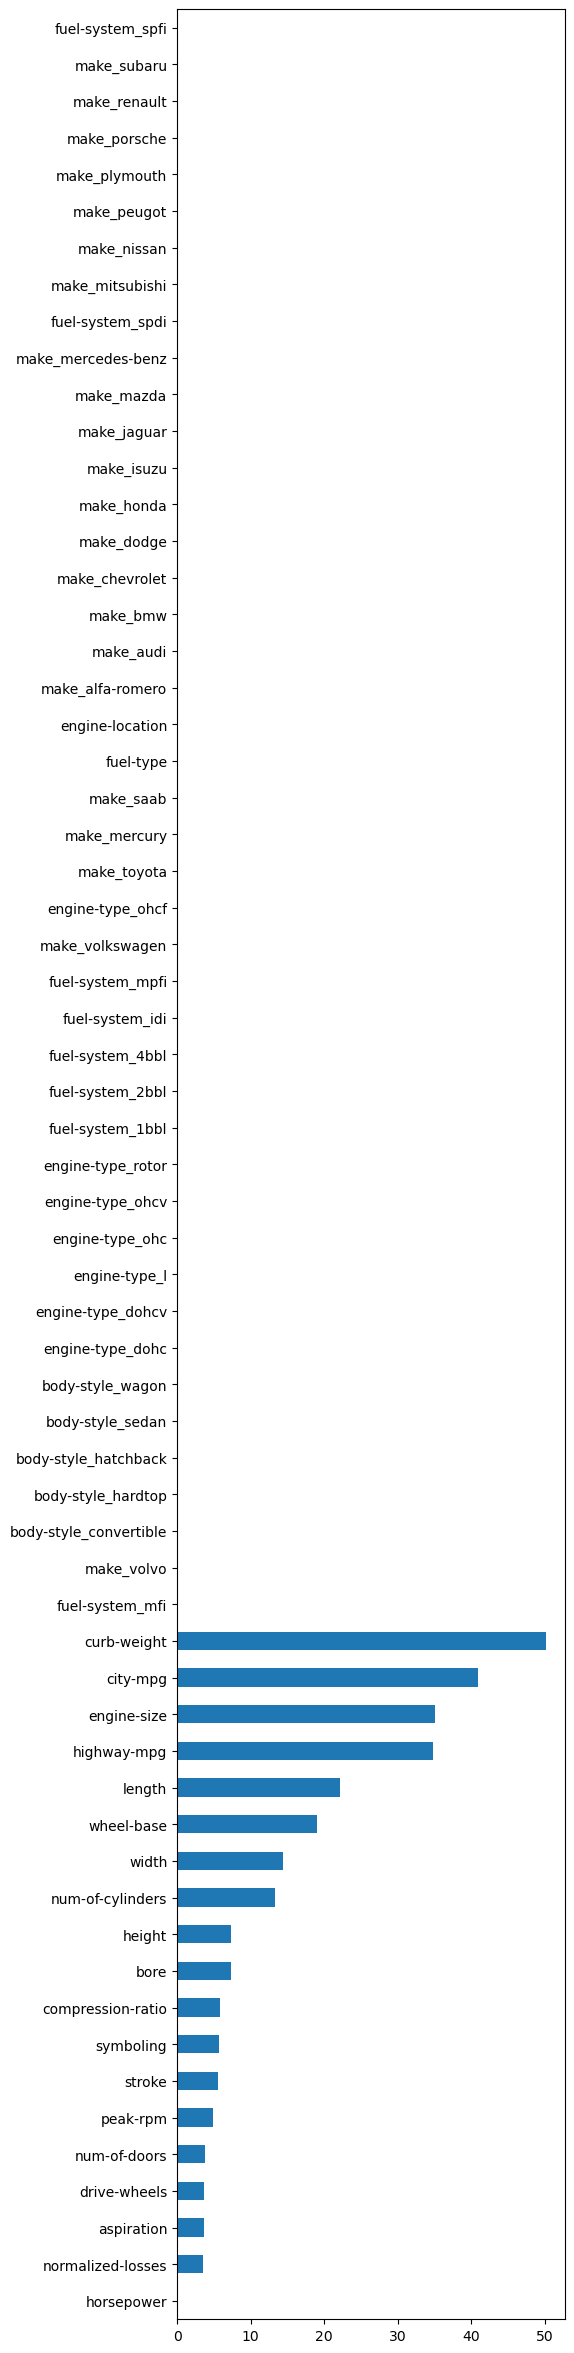

In [140]:
s.sort_values().plot(kind = "barh",figsize = (5,30))

# model building

In [141]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,random_state=0)

In [142]:
model = LinearRegression()
model

LinearRegression()

In [143]:
model.fit(x_train,y_train)

LinearRegression()

# model evolution

In [144]:
# Model Evaluation for Training Data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 2060995.511783911
Root Mean Sqaured Error : 1435.6167705149974
Mean Absolute Error : 1095.4217579165984
R Squared Value : 0.9656252363139479
Adjusted R Squared Value : 0.9439691351917351


# 3 normality of residual

In [145]:
residual = y_train - y_pred_train

<AxesSubplot:xlabel='price', ylabel='Density'>

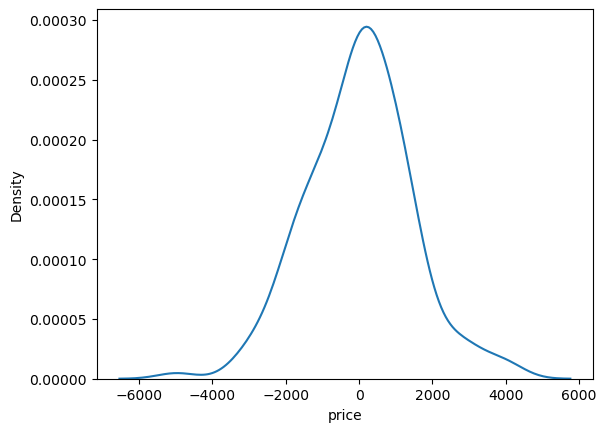

In [146]:
sns.kdeplot(residual)

In [147]:
residual.skew()

0.0006170079176904919

# 4 homoscedasticity

<AxesSubplot:xlabel='price', ylabel='price'>

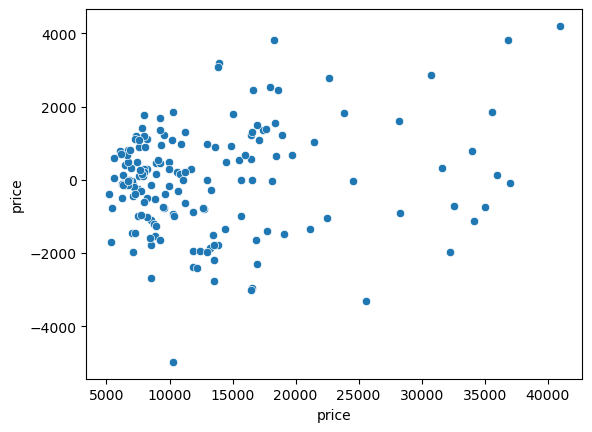

In [148]:
sns.scatterplot(x = y_train,y=residual)

## Model Evaluation for Testing Data

In [149]:

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 25899651.562903948
Root Mean Sqaured Error : 5089.170026920298
Mean Absolute Error : 2681.369757096757
R Squared Value : 0.6237003314016745
Adjusted R Squared Value : 0.38663154018472934


# overfiting

# regularization
# 1 Lasso (L1)

In [150]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [151]:
L_model = Lasso()
L_model.fit(x_train,y_train)
y_pred_l = L_model.predict(x_train)
print(y_pred_l[:5])
y_train[:5]

[16098.80820965 35244.16893045 13282.74075532 11854.81053353
  7560.67048042]


4      17450.0
71     34184.0
134    15040.0
145    11259.0
122     7609.0
Name: price, dtype: float64

In [152]:
r2 = r2_score(y_train,y_pred_l)
r2

0.9655378833355257

## hyper parameter tunning
## 1 Grid search

In [153]:
param_grid ={"alpha": np.arange(0.01,3,0.01)}
grid = GridSearchCV(L_model,param_grid,n_jobs=-1)
grid.fit(x_train,y_train)
grid.best_estimator_

Lasso(alpha=2.9899999999999998)

In [154]:
L_model = grid.best_estimator_
L_model.fit(x_train,y_train)

Lasso(alpha=2.9899999999999998)

In [155]:
# trainning data
r2 = r2_score(y_train, y_pred_l)
r2

0.9655378833355257

In [156]:
## testing data
y_pred = L_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.7484790849547551

# 2 Ridge

In [157]:
# R_model = Ridge()
# R_model.fit(x_train,y_train)
# y_pred_r = R_model.predict(x_train)
# print(y_pred_r[:5])
# y_train[:5]

In [158]:
# r2 = r2_score(y_train,y_pred_r)
# r2

## 1 Grid search

In [159]:
# param_grid ={"alpha": np.arange(0.01,3,0.01)}
# grid = GridSearchCV(R_model,param_grid,n_jobs=-1)
# grid.fit(x_train,y_train)
# grid.best_estimator_

In [160]:
# L_model = grid.best_estimator_
# L_model.fit(x_train,y_train)

In [161]:
# # trainning data
# r2 = r2_score(y_train, y_pred_r)
# r2

In [162]:
# ## testing data
# y_pred = L_model.predict(x_test)
# r2 = r2_score(y_test, y_pred)
# r2

In [163]:
x.head(1).T

,0
symboling,3.0
normalized-losses,115.0
fuel-type,0.0
aspiration,0.0
num-of-doors,1.0
...,...
fuel-system_idi,0.0
fuel-system_mfi,0.0
fuel-system_mpfi,1.0
fuel-system_spdi,0.0


In [176]:
column_names = x.columns


In [165]:
import pickle
import json

In [166]:
with open("Linear model.pkl", "wb") as f:
    pickle.dump(model, f)

In [167]:
json_data = {'fuel-type':{'gas': 0, 'diesel': 1},
             'aspiration':{'std': 0, 'turbo': 1},
              'num-of-doors' :{'four': 0, 'two': 1},
              'drive-wheels':{'fwd': 0, 'rwd': 1, '4wd': 2},
               'engine-location':{'front': 0, 'rear': 1},
               "num_of_cylinders": {'four': 4,'six': 6,'five': 5,'eight': 8,'two': 2,'three': 3,'twelve': 12},
              "columns":list(column_names)}
# json_data

In [168]:
with open("Project_data.json", "w") as f:
    json.dump(json_data, f)

In [169]:
json_data

{'fuel-type': {'gas': 0, 'diesel': 1},
 'aspiration': {'std': 0, 'turbo': 1},
 'num-of-doors': {'four': 0, 'two': 1},
 'drive-wheels': {'fwd': 0, 'rwd': 1, '4wd': 2},
 'engine-location': {'front': 0, 'rear': 1},
 'num_of_cylinders': {'four': 4,
  'six': 6,
  'five': 5,
  'eight': 8,
  'two': 2,
  'three': 3,
  'twelve': 12},
 'columns': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'make_alfa-romero',
  'make_audi',
  'make_bmw',
  'make_chevrolet',
  'make_dodge',
  'make_honda',
  'make_isuzu',
  'make_jaguar',
  'make_mazda',
  'make_mercedes-benz',
  'make_mercury',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_plymouth',
  'make_porsche',
  'make_renault',
  'make_saab',
  'm

# single user input testing

In [170]:
symboling = 3.0 
normalized_losses = 115.0
fuel_type = "gas" 
aspiration = 'turbo'
num_of_doors = 'four'
drive_wheels = 'rwd'
engine_location = 'front'
wheel_base = 109.1
length = 188.8
width = 68.9
height = 55.5
curb_weight = 2952
num_of_cylinders = "five"
engine_size = 173
bore = 3.19
stroke = 2.87
compression_ratio = 10.6
horsepower = 3750
peak_rpm = 5500
city_mpg = 26.0
highway_mpg = 30.0 


make = "volkswagen"
make = "make_" + make

body_style = "hatchback"
body_style = "body-style_" + body_style

engine_type = "ohc"
engine_type = "engine-type_" + engine_type


fuel_system = "spdi"
fuel_system = "fuel-system_" + fuel_system

In [171]:
make_index = list(column_names).index(make)
body_style_index = list(column_names).index(body_style)
engine_type_index = list(column_names).index(engine_type)
fuel_system_index = list(column_names).index(fuel_system)


print(make_index)
print(body_style_index)
print(engine_type_index)
print(fuel_system_index)


41
45
51
61


In [172]:
json_data['columns']

['symboling',
 'normalized-losses',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'make_alfa-romero',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'body-style_convertible',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'engine-type_dohc',
 'engine-type_dohcv',
 'engine-type_l',
 'engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'engine-type_rotor',
 'fuel-system_1bbl',
 'fuel-system_2bbl',
 'fuel-sys

In [173]:
array = np.zeros(len(column_names), dtype = int)
array

array[0] = symboling
array[1] = normalized_losses
array[2] = json_data['fuel-type'][fuel_type]
array[3] = json_data['aspiration'][aspiration]
array[4] = json_data['num-of-doors'][num_of_doors]
array[5] = json_data['drive-wheels'][drive_wheels]
array[6] = json_data['engine-location'][engine_location]
array[7] = wheel_base
array[8] = length
array[9] = width
array[10] = height
array[11] = curb_weight
array[12] = json_data['num_of_cylinders'][num_of_cylinders]
array[13] = engine_size
array[14] = bore
array[15] = stroke
array[16] = compression_ratio
array[17] = horsepower
array[18] = peak_rpm
array[19] = city_mpg
array[20] = highway_mpg

array[make_index] = 1
array[body_style_index] = 1
array[engine_type_index] = 1

array[fuel_system_index] = 1
array

array([   3,  115,    0,    1,    0,    1,    0,  109,  188,   68,   55,
       2952,    5,  173,    3,    2,   10, 3750, 5500,   26,   30,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1,    0])

In [174]:
price = model.predict([array])[0]  # 2D array
print("Predicted car Price is : $", round(price, 2))

Predicted car Price is : $ 20841.68
